In [2]:
import pandas as pd

In [4]:
file_path = "Crime_statistics_2024.xlsx"
df_crime = pd.read_excel(file_path, sheet_name='PIVOT', usecols='A:D', nrows=380)
print(df_crime.head())

  COUNTRIES                  ICCS  YEAR  \
0   Belgium  Intentional homicide  2022   
1  Bulgaria  Intentional homicide  2022   
2   Czechia  Intentional homicide  2022   
3   Denmark  Intentional homicide  2022   
4   Germany  Intentional homicide  2022   

   NUMBER OF POLICE-RECORDED OFFENCES PER 100 000 INHABITANTS  
0                                               1.54           
1                                               1.11           
2                                               0.75           
3                                               1.00           
4                                               0.74           


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Slicer List extension is not supported and will be removed
  warn(msg)


In [12]:
file_path = "API_EN.POP.DNST_DS2_en_csv_v2_19479.csv"
df = pd.read_csv(file_path, skiprows=4)
df_popden = df[['Country Name', '2022']]
print(df_popden.head())

                  Country Name        2022
0                        Aruba  596.166667
1  Africa Eastern and Southern   49.297201
2                  Afghanistan   62.215541
3   Africa Western and Central   54.985592
4                       Angola   28.583484


In [14]:
import plotly.express as px
df_popden_cleaned = df_popden.rename(columns={
    'Country Name': 'COUNTRIES',
    '2022': 'Population Density'
})

merged_df = pd.merge(df_crime, df_popden_cleaned[['COUNTRIES', 'Population Density']], on='COUNTRIES', how='inner')

merged_df = merged_df.rename(columns={
    'NUMBER OF POLICE-RECORDED OFFENCES PER 100 000 INHABITANTS': 'Crime Rate'
})
fig_popden = px.choropleth(merged_df,
                    locations='COUNTRIES',
                    color='Population Density',
                    locationmode='country names',
                    hover_name='COUNTRIES',
                    color_continuous_scale='Viridis',
                    range_color=(0, 1000),
                    title='Population Density In Europe By Country (2022)')
fig_popden.show()


In [15]:
fig = px.choropleth(merged_df,
                    locations='COUNTRIES',
                    color='Crime Rate',
                    locationmode='country names',
                    hover_name='COUNTRIES',
                    color_continuous_scale='Viridis',
                    range_color=(0, 100),
                    title='Crime Rate In Europe By Country (2022)')
fig.show()

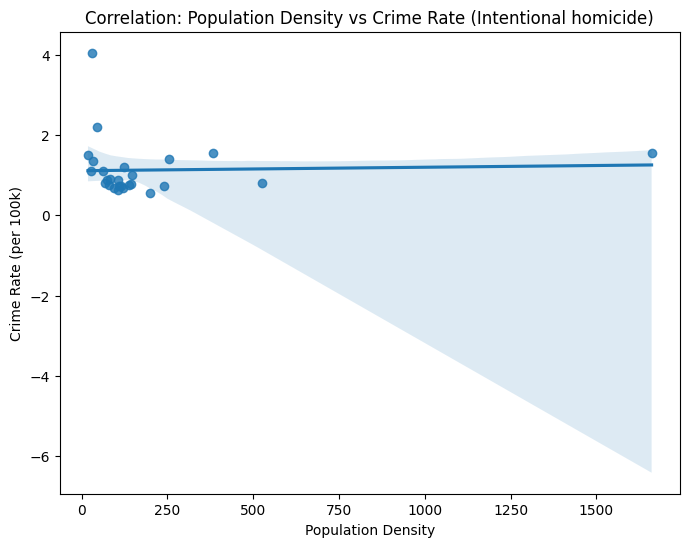

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = merged_df[merged_df['ICCS'] == 'Intentional homicide']

plt.figure(figsize=(8, 6))
sns.regplot(x='Population Density', y='Crime Rate', data=subset)
plt.title('Correlation: Population Density vs Crime Rate (Intentional homicide)')
plt.xlabel('Population Density')
plt.ylabel('Crime Rate (per 100k)')
plt.show()
